## Library Imports
There are many libraries that are going to be used. I import and install them in this section.

In [55]:
#  Install the Tensorflow library using pip as the Python package manager.
!pip install tensorflow

In [56]:
!pip install keras-tuner

In [57]:
!pip install seaborn --upgrade

In [58]:
!pip install --user matplotlib==3.7.3

In [59]:
!pip install scikeras

In [60]:
# Import the necessary modules
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Deep learning libraries
import tensorflow as tf
import kerastuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, ZeroPadding1D
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score

from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, concatenate
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import itertools

from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adam
from keras.models import load_model

# libraries for models
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

# Libraries for Metrics evaluation
from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve, RocCurveDisplay

## Data loading
I load the IBM HR dataset that I got from this dataset on Kaggle. https://www.kaggle.com/datasets/whenamancodes/hr-employee-attrition

In [61]:
project_data = pd.read_csv("./dataset/Employee Analysis Attrition Report/HR Employee Attrition.csv") 
# I am loading my dataset into my code as a Pandas Dataframe

##  Analysis of the Data
Here, I'm going to output basic details about the data

In [62]:
project_data.head() # I display the first few rows of the dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [63]:
project_data.info() # This will display a summary about the data
# From this, we can see that there are 1470 records, 35 columns and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [64]:
project_data.describe() # This will display various stats for my data, column-wise

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [65]:
project_data.shape # I can get the dimensions of my dataframe

(1470, 35)

In [66]:
project_data.columns # These are the columns as a list

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [67]:
project_data.isna().sum() # Checking whether any of my columns have any missing values
# All the columns have all the values. No missing values in the data

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Exploratory Data Analysis
Doing some EDA to understand the data and the features and to identify the features that contribute the most

### Univariate Analysis
Checking feature-wise individually.
If it is a numerical column, display a kernel density estimation (KDE).
Otherwise, display a count plot.

In [68]:
numeric_columns = [column for column in project_data.columns if project_data[column].dtype == 'int64'] 
print(numeric_columns)
# This will get all the columns where the data type is int64. This means that it is a numerical column/feature.

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


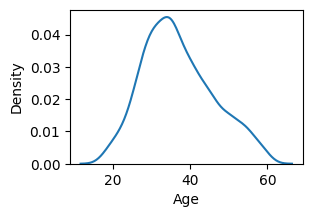

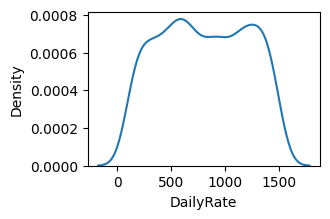

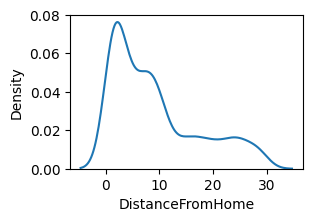

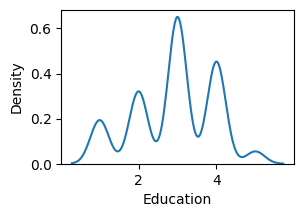

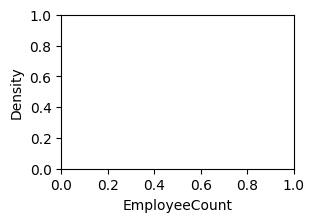

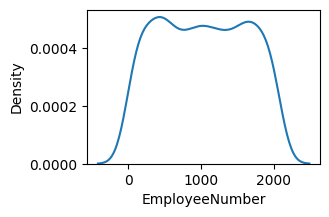

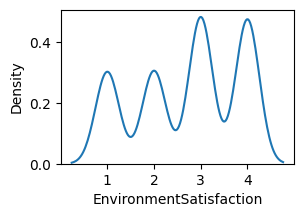

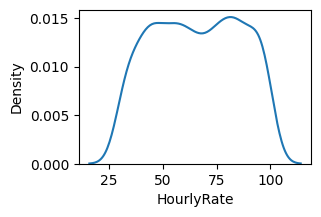

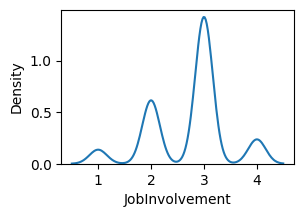

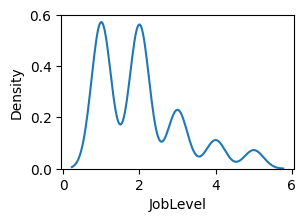

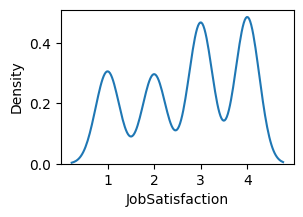

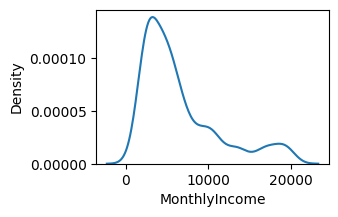

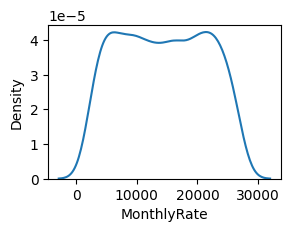

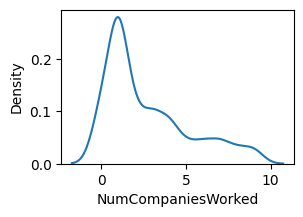

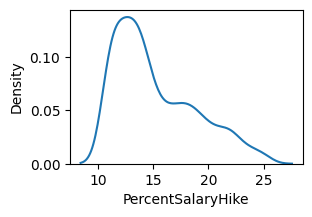

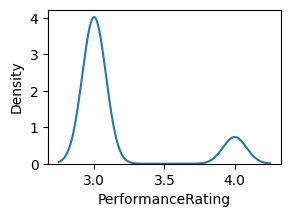

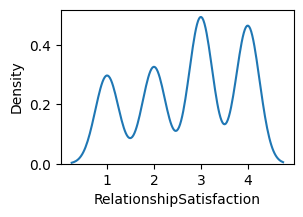

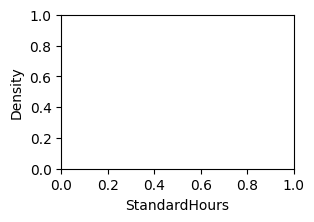

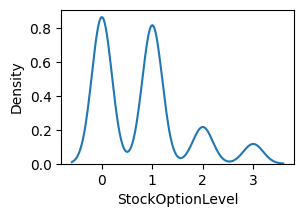

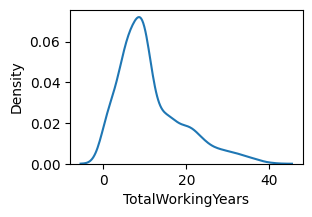

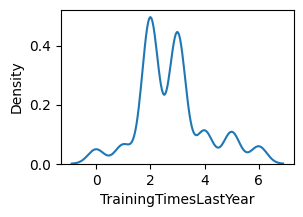

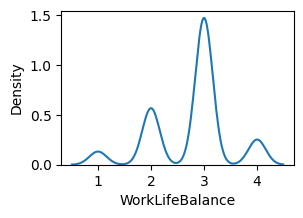

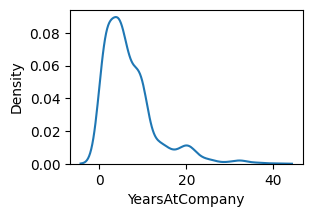

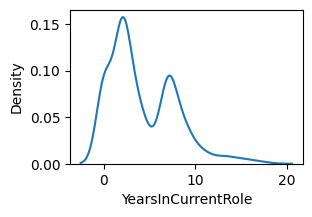

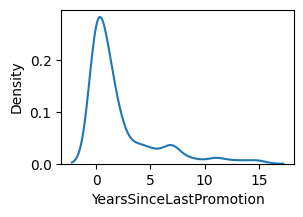

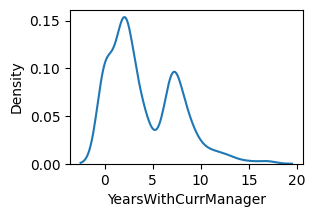

In [69]:
for column in numeric_columns:
    plt.figure(figsize=(3,2))
    sns.kdeplot(data=project_data, x=column, palette="crest")
    plt.show()

# The density and the distribution of the values for each of the columns. 

In [70]:
categorical_columns = [column for column in project_data.columns if project_data[column].dtype != 'int64']
print(categorical_columns)

# This will get all the columns where the data type is not int64. This means that it is a categorical column/feature.
# I will convert these during the preprocessing.

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


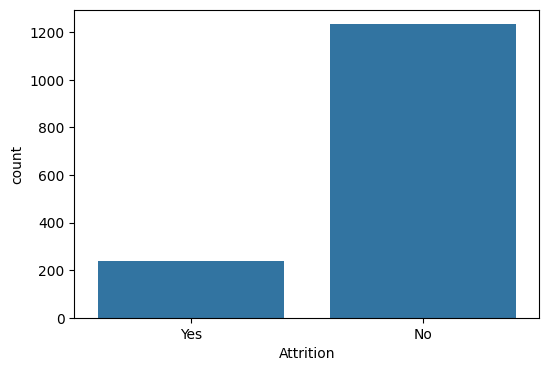

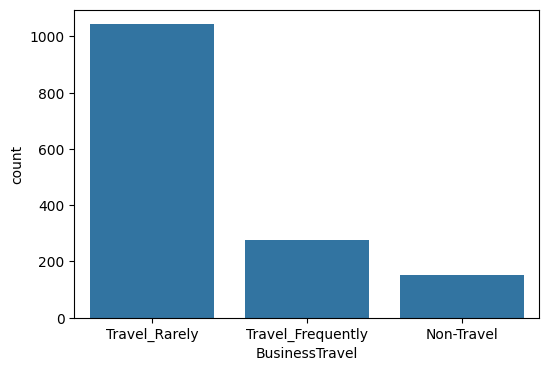

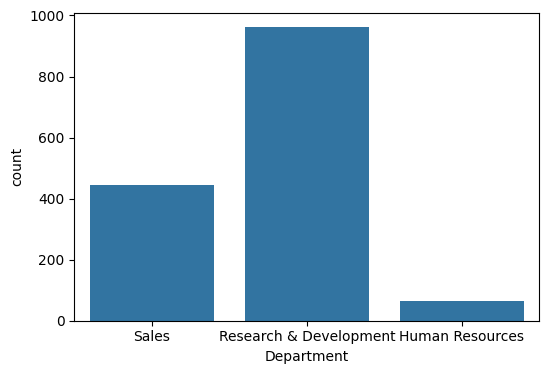

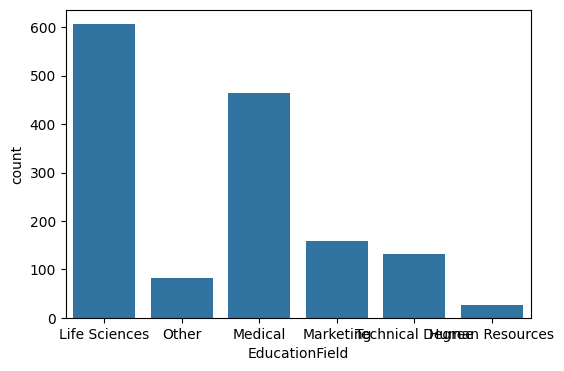

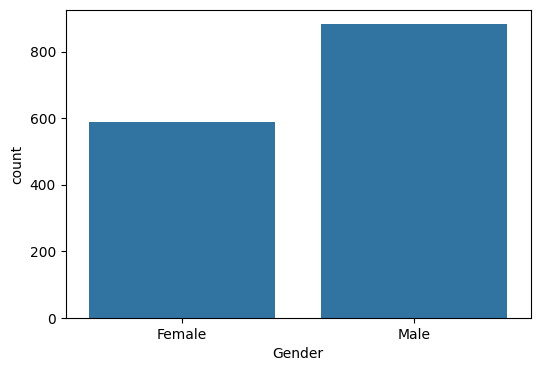

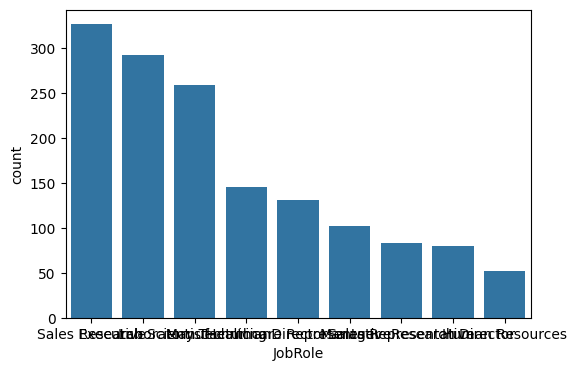

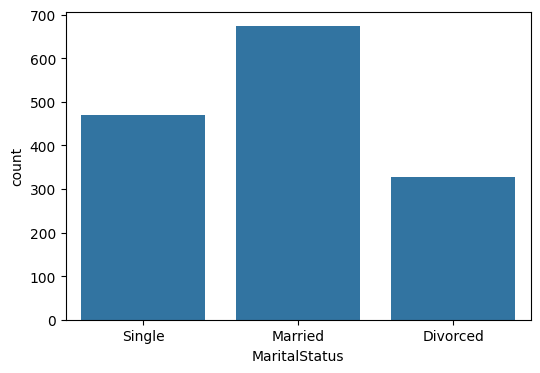

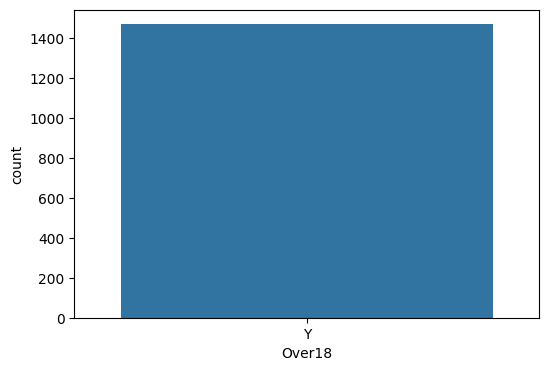

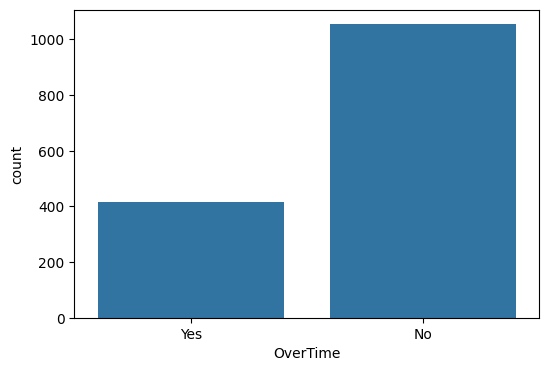

In [71]:
for column in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=project_data[column])
    plt.show()
# I show count plots for each categorical column. - The values and how many times they occur are counted and shown in the graph.

### Bivariate Analysis
I'm going to check all the variables with Attrition variable to see their density and distributions.

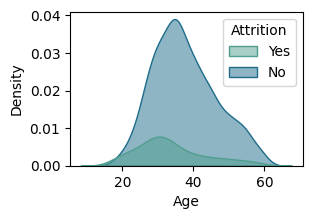

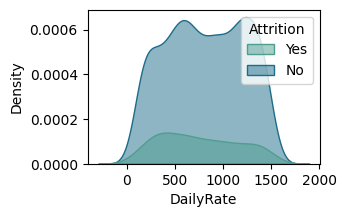

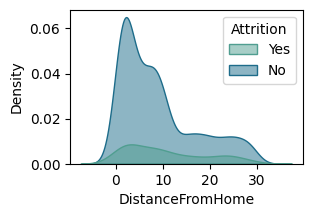

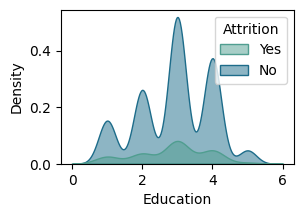

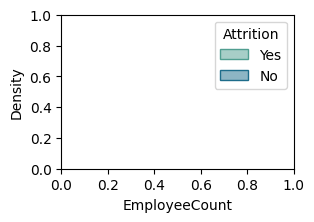

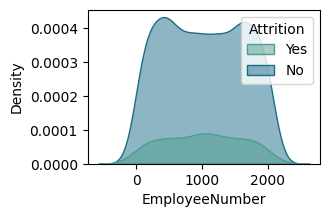

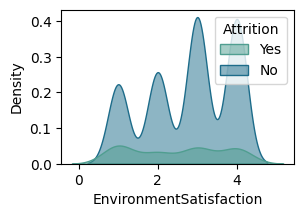

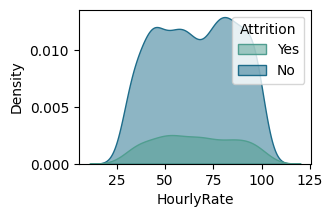

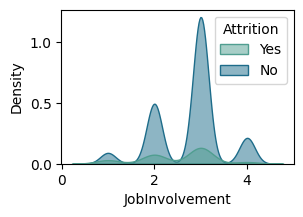

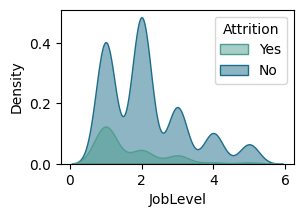

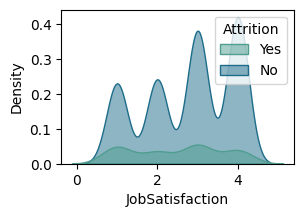

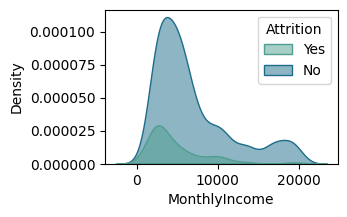

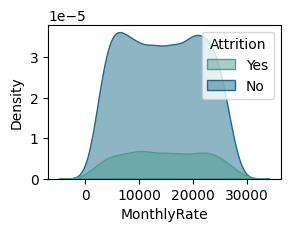

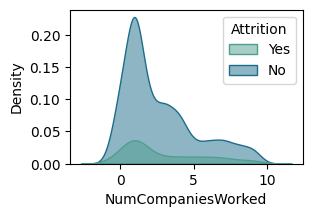

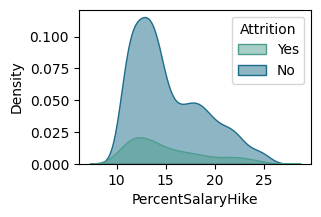

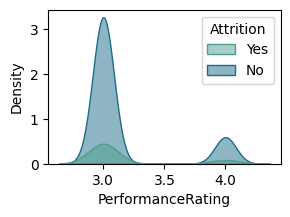

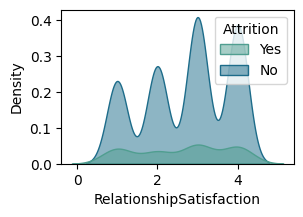

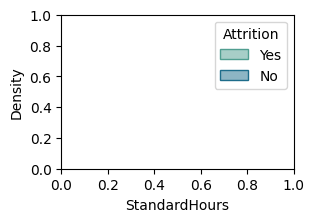

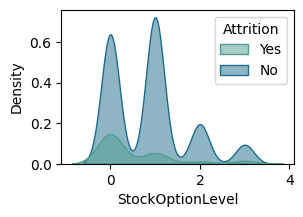

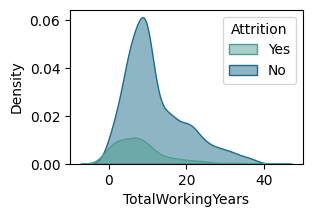

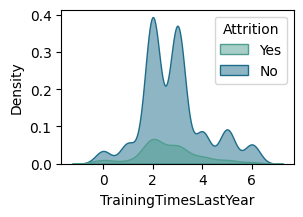

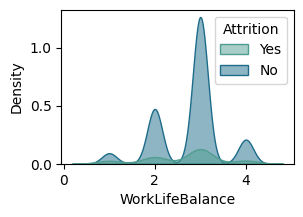

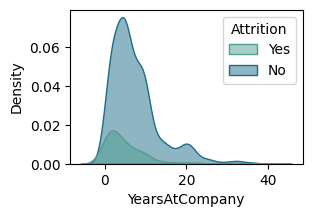

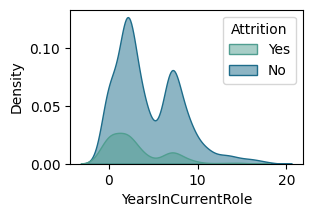

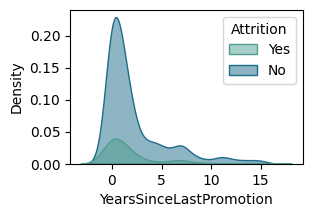

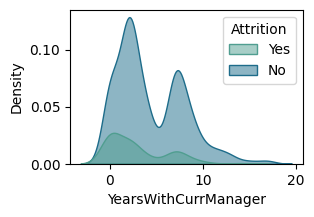

In [72]:
for column in numeric_columns:
    plt.figure(figsize=(3,2))
    sns.kdeplot(data=project_data, x=column, hue="Attrition", fill=True, alpha=.5, palette="crest")
    plt.show()

# The numeric variables and attrition values are plotted in the graphs.

## Correlation Analysis

<Axes: >

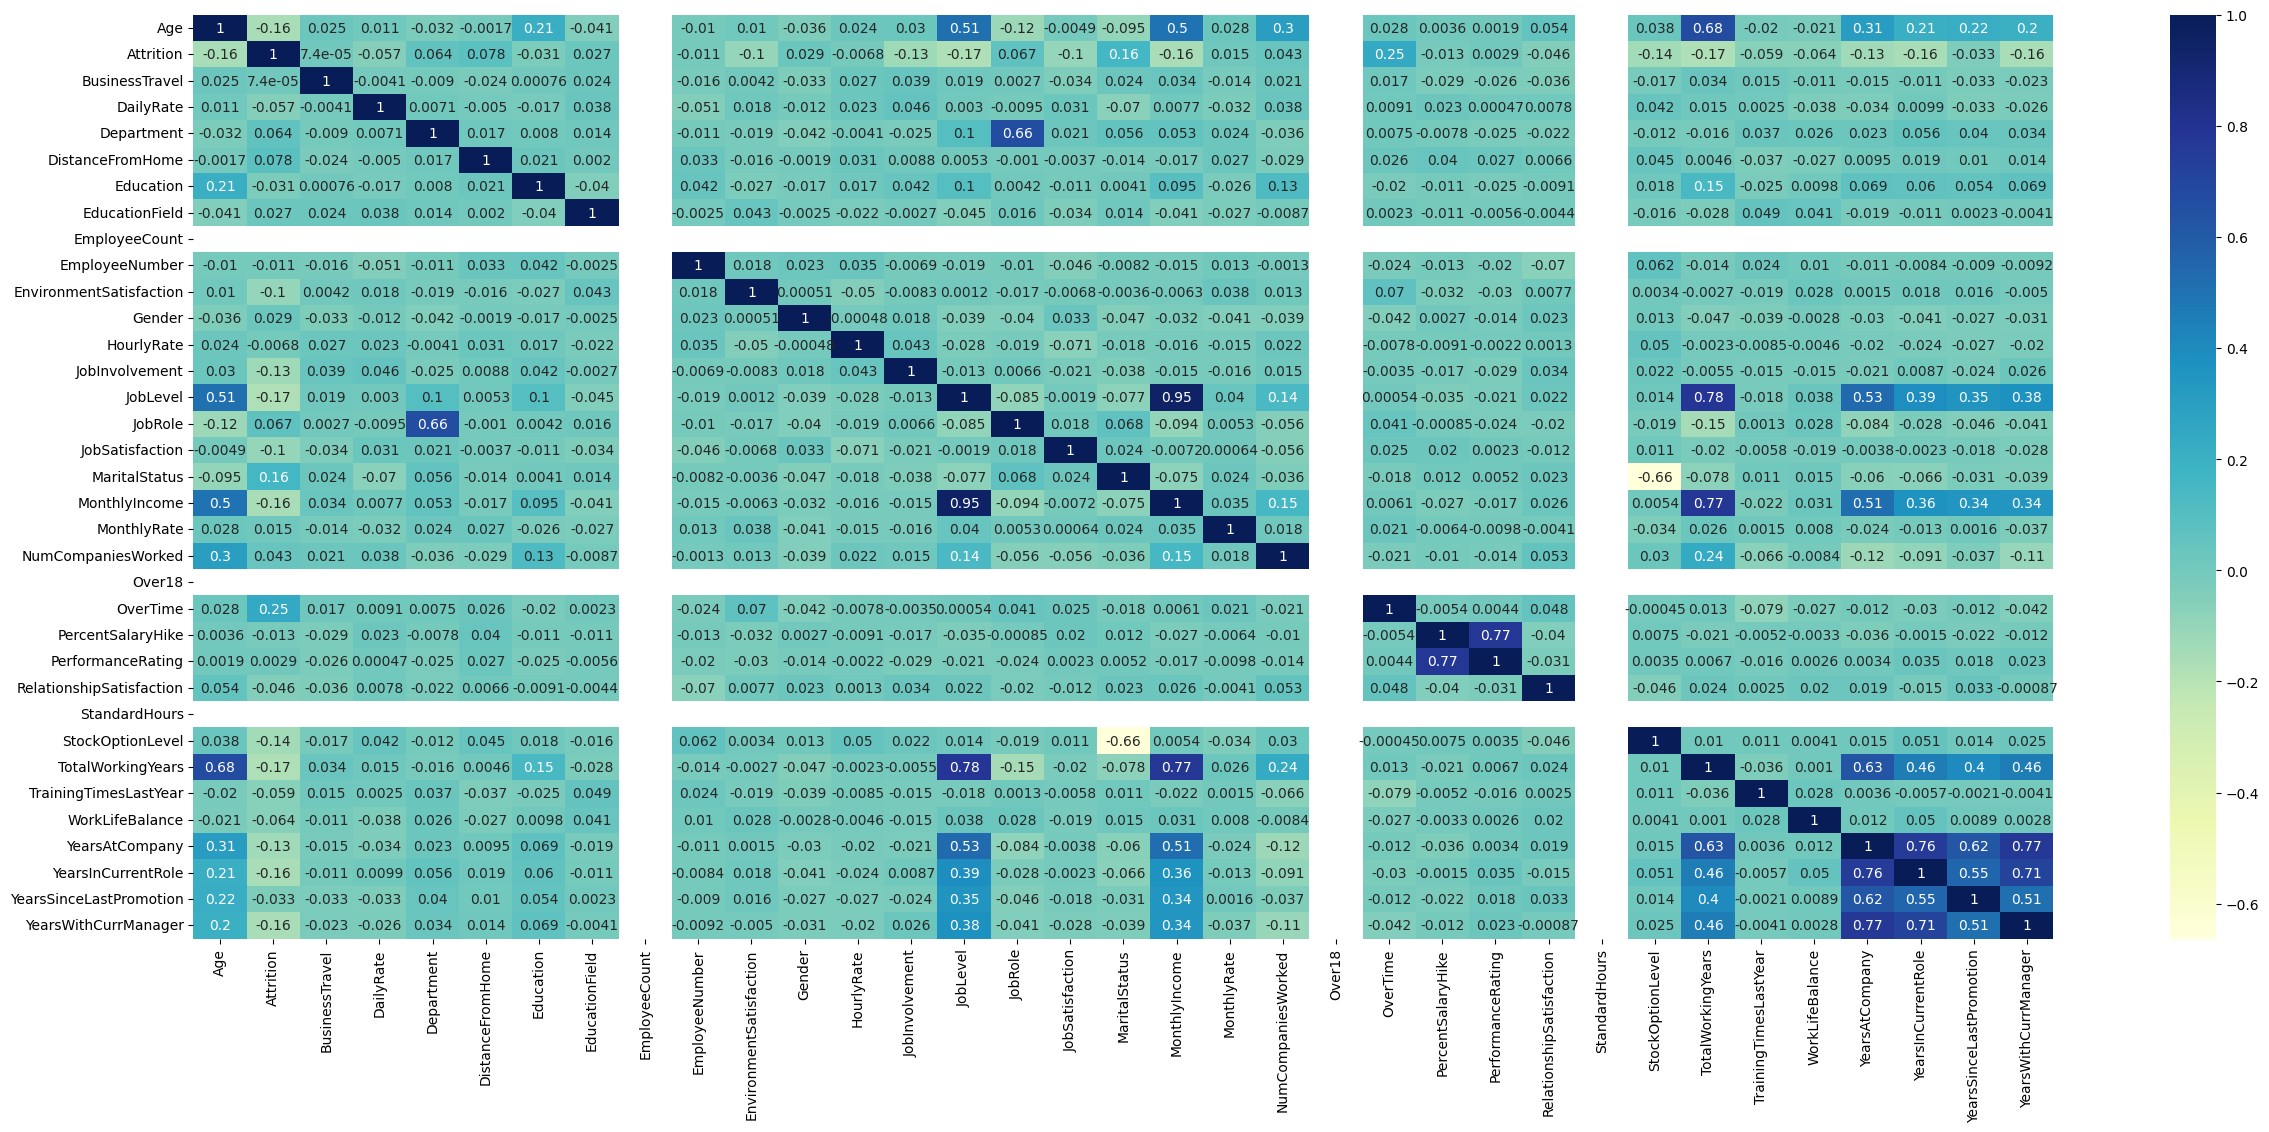

In [73]:
df1 = project_data.copy()

encoder = LabelEncoder()
for column in categorical_columns:
    df1[column] = encoder.fit_transform(df1[column])

plt.figure(figsize=(30,12))
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

# Summary of the Correlation Analysis :
# 'Over Time', correlation: +0.25
# 'Age', correlation: -0.16 
# 'Total Working Years', correlation: -0.17
# 'Job Level', correlation: -0.17
# 'Years At Company', correlation: -0.13
# 'Years In Current Role', correlation: -0.16
# 'Years With Current Manager', correlation: -0.16
# 'Business Travel', correlation: +0.000074
# 'Distance From Home', correlation: +0.078
# 'Stock Option Level', correlation: -0.14

## Data Preprocessing and Pipelining

In [74]:
X = project_data.drop(columns=["Attrition"]) # I'm dropping the Attrition column to get X
Y = project_data["Attrition"] # The Attrition column will be Y

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# Splitting X and corresponding Y into my training and test datasets with an 80:20 ratio.

In [76]:
print('Train dataset shape:',X_train.shape)
print('Test dataset shape', X_test.shape)

print('Train dataset rows: ', len(X_train))
print('Test dataset rows: ', len(X_test))

Train dataset shape: (1176, 34)
Test dataset shape (294, 34)
Train dataset rows:  1176
Test dataset rows:  294


In [77]:
numeric_columns = X_train.select_dtypes(exclude='object').columns
print("Numeric Columns:")
print(numeric_columns)
print('*'*100)
categorical_columns = X_train.select_dtypes(include='object').columns
print("Categorical Columns:")
print(categorical_columns)

Numeric Columns:
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
****************************************************************************************************
Categorical Columns:
Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [78]:
# I'm defining two Pipelines objects and a ColumnTransformer object to preprocess the numeric and categorical features separately


numeric_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler(with_mean=True))
])

print(numeric_features)
print('*'*100)

categorical_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder()),
    ('scaling', StandardScaler(with_mean=False))
])

print(categorical_features)

processing = ColumnTransformer([
    ('numeric', numeric_features, numeric_columns),
    ('categorical', categorical_features, categorical_columns)
])

processing

Pipeline(steps=[('handlingmissingvalues', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])
****************************************************************************************************
Pipeline(steps=[('handlingmissingvalues',
                 SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRat...
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding', OneHotEncoder()),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object'))])

## Generic Methods for Model Preparation & Metric Evaliation

In [79]:
def prepare_model(name, algorithm):
    model = Pipeline(steps= [
        ('processing',processing),
        ('pca', TruncatedSVD(n_components=3, random_state=12)),
        ('modeling', algorithm)
    ])
    model.fit(X_train, y_train)

    return model

In [80]:
def prepare_evaluation(model, model_name, X_test, y_test):
    plt.figure(figsize=(12, 4))

    # Initialize lists to store evaluation metrics
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    support_scores = []
    specificity_scores = []
    misclassification_rates = []

    # Make predictions
    if model.name.startswith('sequential'):
        y_pred = model.predict(X_test)
        print('model starts with sequential')
    elif model.name.startswith('model'):
        y_pred = model.predict([X_test, X_test])

    # Adjust the threshold and create the confusion matrix
    y_pred_binary = (y_pred > 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred_binary)
    accuracy_scores.append(accuracy_score(y_test, y_pred_binary))
    f1_scores.append(f1_score(y_test, y_pred_binary))
    precision_scores.append(precision_score(y_test, y_pred_binary))
    recall_scores.append(recall_score(y_test, y_pred_binary))
    misclassification_rate = 1 - accuracy_score(y_test, y_pred_binary)
    misclassification_rates.append(misclassification_rate)
    
    # Calculate support and specificity
    tn, fp, fn, tp = cm.ravel()
    support_scores.append(tp + fn)
    specificity_scores.append(tn / (tn + fp))

    # Plot confusion matrix
    plot_confusion_matrix(cm, classes=['Negative', 'Positive'], model_name=model_name)

    # Store metrics in dictionary
    ensemble_metrics[model_name] = {
        'Accuracy': np.mean(accuracy_scores),
        'F1 Score': np.mean(f1_scores),
        'Precision': np.mean(precision_scores),
        'Recall': np.mean(recall_scores),
        'Support': np.mean(support_scores),
        'Specificity': np.mean(specificity_scores),
        'Misclassification Rate': np.mean(misclassification_rates)

    }

In [81]:
def prepare_roc_curve(model, model_name, X_test, y_test):
    plt.figure(figsize=(4, 3))
        
    print("Model: ", model_name)
    print()
    # model.summary()
    if model.name.startswith('sequential'):
        y_score = model.predict(X_test)  # Default for single-input models
    elif model.name.startswith('model'):
        y_score = model.predict([X_test, X_test])
    else:
        y_score = model.predict(X_test)  # Default for single-input models
        
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'AUC ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

In [82]:
algorithms = [('bagging classifier', BaggingClassifier()), 
              ('KNN classifier', KNeighborsClassifier()), 
              ('Random Forest calssifier', RandomForestClassifier()), 
              ('Adaboost classifier', AdaBoostClassifier()), 
              ('Gradientboost classifier', GradientBoostingClassifier()),
              ('MLP', MLPClassifier())
             ]

trained_models = []
model_and_score = {}

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[0],tup[1])

In [83]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1176, 34)
Shape of y_train: (1176,)
Shape of X_test: (294, 34)
Shape of y_test: (294,)


In [84]:
model.named_steps['processing'].fit(X_train)

# Transform the training and testing data using the preprocessing steps
X_train_transformed = model.named_steps['processing'].transform(X_train)
X_test_transformed = model.named_steps['processing'].transform(X_test)

model.named_steps['pca'].fit(X_train_transformed)

# Perform dimensionality reduction using TruncatedSVD
X_train_svd = model.named_steps['pca'].transform(X_train_transformed)
X_test_svd = model.named_steps['pca'].transform(X_test_transformed)

In [85]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit label encoder and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [86]:
X_train_reshaped = np.expand_dims(X_train_svd, axis=2)
X_test_reshaped = np.expand_dims(X_test_svd, axis=2)

# Train the CNN Model
# cnn_model = train_cnn_model(X_train_reshaped, y_train_encoded, X_test_reshaped, y_test_encoded)

In [87]:
# Check the shape of the input arrays
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Check the content of the input arrays
print("Sample of X_train:")
print(X_train[:5])  # Print the first 5 rows of X_train to verify its content
print("Sample of y_train:")
print(y_train[:5])  # Print the first 5 elements of y_train to verify its content
print("Sample of X_test:")
print(X_test[:5])   # Print the first 5 rows of X_test to verify its content
print("Sample of y_test:")
print(y_test[:5])   # Print the first 5 elements of y_test to verify its content


Shape of X_train: (1176, 34)
Shape of y_train: (1176,)
Shape of X_test: (294, 34)
Shape of y_test: (294,)
Sample of X_train:
      Age BusinessTravel  DailyRate              Department  DistanceFromHome  \
1097   24  Travel_Rarely        350  Research & Development                21   
727    18     Non-Travel        287  Research & Development                 5   
254    29  Travel_Rarely       1247                   Sales                20   
1175   39  Travel_Rarely        492  Research & Development                12   
1341   31  Travel_Rarely        311  Research & Development                20   

      Education    EducationField  EmployeeCount  EmployeeNumber  \
1097          2  Technical Degree              1            1551   
727           2     Life Sciences              1            1012   
254           2         Marketing              1             349   
1175          3           Medical              1            1654   
1341          3     Life Sciences              1

## Model Preparation

In [88]:
def create_fnn(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32),
                    activation='relu', input_dim=input_dim))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=256, step=32),
                    activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [89]:
def create_wide_and_deep_model(hp):
    input_dim = X_train.shape[1]

    wide_inputs = Input(shape=(input_dim,))
    deep_inputs = Input(shape=(input_dim,))

    wide_layer = Dense(units=hp.Int('wide_units', min_value=32, max_value=256, step=32),
                       activation='relu')(wide_inputs)

    deep_layer = Dense(units=hp.Int('deep_units_1', min_value=32, max_value=256, step=32),
                      activation='relu')(deep_inputs)
    deep_layer = Dense(units=hp.Int('deep_units_2', min_value=16, max_value=128, step=16),
                      activation='relu')(deep_layer)

    merged_layer = concatenate([wide_layer, deep_layer])

    output = Dense(1, activation='sigmoid')(merged_layer)

    model = Model(inputs=[wide_inputs, deep_inputs], outputs=output)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [90]:
def create_cnn_model(hp):
    input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])
    
    model = Sequential()
    
    model.add(Conv1D(filters=hp.Int('filters', min_value=16, max_value=64, step=16),
                     kernel_size=hp.Int('kernel_size', min_value=2, max_value=5, step=1),
                     padding='same',
                     activation='relu',
                     input_shape=input_shape))
    
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [91]:
X_train = X_train_svd
y_train = y_train_encoded
X_test = X_test_svd
y_test = y_test_encoded
input_dim = X_train.shape[1]

In [92]:
fnn_tuner = kt.RandomSearch(
    create_fnn,
    objective='val_accuracy',
    max_trials=50,
    directory='my_dir',
    project_name='fnn_hyperparameter_tuning')

fnn_tuner.search(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

best_fnn_model = fnn_tuner.get_best_models(num_models=1)[0]
best_fnn_hyperparameters = fnn_tuner.get_best_hyperparameters(num_trials=1)[0]

best_fnn_model.summary()

best_fnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

best_fnn_accuracy = best_fnn_model.evaluate(X_test, y_test, verbose=0)[1]
print("Best FNN Model Accuracy:", best_fnn_accuracy)
print("Best FNN Hyperparameters:", best_fnn_hyperparameters)

Reloading Tuner from my_dir\fnn_hyperparameter_tuning\tuner0.json


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                128       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               4224      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4481 (17.50 KB)
Trainable params: 4481 (17.50 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [93]:
wd_tuner = RandomSearch(
    create_wide_and_deep_model,
    objective='val_accuracy',
    max_trials=50,
    directory='my_dir',
    project_name='wide_and_deep_hyperparameter_tuning'
)

wd_tuner.search_space_summary()
wd_tuner.search([X_train, X_train], y_train, epochs=100, batch_size=32, validation_data=([X_test, X_test], y_test))

best_wd_model = wd_tuner.get_best_models(num_models=1)[0]
best_wd_hyperparameters = wd_tuner.get_best_hyperparameters(num_trials=1)[0]

best_wd_model.fit([X_train, X_train], y_train, epochs=100, batch_size=32, validation_data=([X_test, X_test], y_test))

best_wide_and_deep_accuracy = best_wd_model.evaluate([X_test, X_test], y_test, verbose=0)[1]
print("Best Wide & Deep Model Accuracy:", best_wide_and_deep_accuracy)

Reloading Tuner from my_dir\wide_and_deep_hyperparameter_tuning\tuner0.json
Search space summary
Default search space size: 3
wide_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
deep_units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
deep_units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
Epoch 1/100
37/37 [==============================] - 1s 4ms/step - loss: 0.3845 - accuracy: 0.8503 - val_loss: 0.3606 - val_accuracy: 0.8707
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3835 - accuracy: 0.8435 - val_loss: 0.3627 - val_accuracy: 0.8605
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8452 - val_loss: 0.3652 - val_accuracy: 0.8639
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3804 -

In [94]:
print("-------- CNN ----------")

X_train_reshaped = np.expand_dims(X_train_svd, axis=2)
X_test_reshaped = np.expand_dims(X_test_svd, axis=2)

print("X_train_reshaped shape:", X_train_reshaped.shape)
print("X_test_reshaped shape:", X_test_reshaped.shape)

cnn_tuner = kt.Hyperband(create_cnn_model,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

cnn_tuner.search(X_train_reshaped, y_train, epochs=100, validation_data=(X_test_reshaped, y_test))

best_cnn_hyperparameters=cnn_tuner.get_best_hyperparameters(num_trials=1)[0]

best_cnn_model = cnn_tuner.hypermodel.build(best_cnn_hyperparameters)
cnn_history = best_cnn_model.fit(X_train_reshaped, y_train, epochs=100, validation_data=(X_test_reshaped, y_test))

best_cnn_accuracy = cnn_history.history['val_accuracy'][-1]
print("Best CNN Model Accuracy:", best_cnn_accuracy)

-------- CNN ----------
X_train_reshaped shape: (1176, 3, 1)
X_test_reshaped shape: (294, 3, 1)
Reloading Tuner from my_dir\intro_to_kt\tuner0.json

Epoch 1/100
37/37 [==============================] - 1s 6ms/step - loss: 0.4713 - accuracy: 0.8274 - val_loss: 0.3770 - val_accuracy: 0.8673
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8401 - val_loss: 0.3591 - val_accuracy: 0.8741
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8401 - val_loss: 0.3641 - val_accuracy: 0.8673
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8452 - val_loss: 0.3678 - val_accuracy: 0.8639
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8469 - val_loss: 0.3604 - val_accuracy: 0.8673
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8393 - val_loss: 0.3628 - val_accuracy: 0.8673
Epoch

In [95]:
models = [best_fnn_model, best_wd_model, best_cnn_model] 

print("Accuracy for FNN:", "{:.2%}".format(best_fnn_accuracy))
print("Accuracy for Wide and Deep:", "{:.2%}".format(best_wide_and_deep_accuracy))
print("Accuracy for CNN:", "{:.2%}".format(best_cnn_accuracy))

Accuracy for FNN: 86.05%
Accuracy for Wide and Deep: 85.71%
Accuracy for CNN: 84.35%


In [96]:
# # Use the same dataset for training all models
# X_train_all = X_train  # Assuming X_train is properly preprocessed

# # Split the data consistently
# X_train_fnn, X_train_wd, X_train_cnn = X_train, X_train, X_train_cnn

# # Fit each model with its corresponding training data
# best_fnn_model.fit(X_train_fnn, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
# best_wd_model.fit([X_train_wd, X_train_wd], y_train, epochs=100, batch_size=32, validation_data=([X_test, X_test], y_test))
# best_cnn_model.fit(X_train_cnn, y_train, epochs=100, batch_size=32, validation_data=(X_test_cnn, y_test))

# # Wrap each model with KerasClassifier/KerasRegressor
# fnn_classifier = KerasClassifier(build_fn=lambda: best_fnn_model, epochs=100, batch_size=32, verbose=0)
# wd_classifier = KerasClassifier(build_fn=lambda: best_wd_model, epochs=100, batch_size=32, verbose=0)
# cnn_classifier = KerasClassifier(build_fn=lambda: best_cnn_model, epochs=100, batch_size=32, verbose=0)

# # Define the voting classifier with the wrapped models
# voting_clf = VotingClassifier(
#     estimators=[('fnn', fnn_classifier), ('wd', wd_classifier), ('cnn', cnn_classifier)],
#     voting='soft'  # Use soft voting for probabilities
# )

# # Fit the voting classifier
# voting_clf.fit(X_train_all, y_train)

# # Evaluate the voting classifier on the test set
# voting_accuracy = voting_clf.score([X_test, X_test, X_test_cnn], y_test)
# print("Voting Classifier Accuracy:", voting_accuracy)


In [97]:
# Alternate method
from sklearn.ensemble import VotingClassifier

keras_estimator_fnn = KerasClassifier(build_fn=create_fnn, hp=best_fnn_hyperparameters, epochs=100, batch_size=32, verbose=0)
keras_estimator_wd = KerasClassifier(build_fn=create_wide_and_deep_model, hp=best_wd_hyperparameters, epochs=100, batch_size=32, verbose=0)
keras_estimator_cnn = KerasClassifier(build_fn=create_cnn_model, hp=best_cnn_hyperparameters, epochs=100, batch_size=32, verbose=0)

# Define a list of (name, estimator) tuples for the VotingClassifier
estimators = [
    ('fnn', keras_estimator_fnn),
    ('wide_and_deep', keras_estimator_wd),
    ('cnn', keras_estimator_cnn)
]

keras_estimator_fnn.fit(X_train, y_train)
keras_estimator_cnn.fit(X_train, y_train)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
X_train_reshaped = np.expand_dims(X_train, axis=-1)

X_train_wd = [X_train_reshaped, X_train_reshaped]
print("Shape of X_train_wd[0]:", X_train_wd[0].shape)
print("Shape of X_train_wd[1]:", X_train_wd[1].shape)

X_train_wd_concatenated = np.concatenate([X_train_reshaped, X_train_reshaped], axis=1)
print("Shape of X_train_wd_concatenated:", X_train_wd_concatenated.shape)

# Fit the wide and deep model
# keras_estimator_wd.fit(X_train_wd_concatenated, y_train)

# Define a list of (name, estimator) tuples for the VotingClassifier
estimators = [
    ('fnn', keras_estimator_fnn),
    # ('wide_and_deep', keras_estimator_wd),
    ('cnn', keras_estimator_cnn)
]

voting_classifier = VotingClassifier(estimators=estimators, voting='hard')

voting_classifier.fit(X_train, y_train)

# Evaluate the ensemble classifier
ensemble_accuracy = voting_classifier.score(X_test, y_test)
print("Voting Ensemble Accuracy:", ensemble_accuracy)

Shape of X_train: (1176, 3)
Shape of y_train: (1176,)
Shape of X_train_wd[0]: (1176, 3, 1)
Shape of X_train_wd[1]: (1176, 3, 1)
Shape of X_train_wd_concatenated: (1176, 6, 1)
Voting Ensemble Accuracy: 0.8537414965986394


In [99]:
def evaluate_ensemble_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    support = np.sum(y_true)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    misclassification_rate = 1 - accuracy
    
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Support: {support}")
    print(f"Specificity: {specificity}")
    print(f"Misclassification Rate: {misclassification_rate}")

In [101]:
# Define a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, model_name):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# ensemble_metrics = {}  

# print(dl_ensemble_models)
# for i, ensemble_model in enumerate(dl_ensemble_models, 1):
#     # print(ensemble_model)
#     if i == 1:
#         model_name = 'Stacking'
#     elif i == 2:
#         model_name = 'Voting'
#     elif i == 3:
#         model_name = 'Simple Average'
#     print(model_name)
#     prepare_evaluation(ensemble_model, model_name, meta_X_test, y_test)

# df_ensemble_metrics = pd.DataFrame(ensemble_metrics).T
# print()
# print(df_ensemble_metrics)
# print()

Evaluation Metrics for Voting Classifier:
Accuracy: 0.8537414965986394
F1 Score: 0.2181818181818182
Precision: 0.375
Recall: 0.15384615384615385
Support: 39
Specificity: 0.9607843137254902
Misclassification Rate: 0.1462585034013606


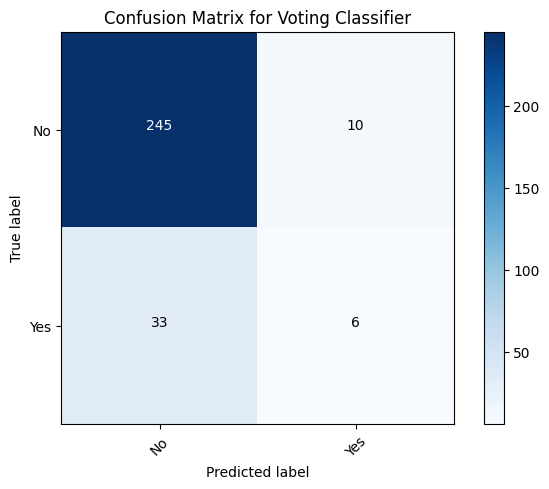

In [102]:
voting_predictions = voting_classifier.predict(X_test)

# Call evaluate_ensemble_model
evaluate_ensemble_model(y_test, voting_predictions, "Voting Classifier")

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, voting_predictions)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No', 'Yes'], model_name="Voting Classifier")
plt.show()

10/10 [==============================] - 0s 1ms/step
Evaluation Metrics for Simple Average Ensemble:
Accuracy: 0.8571428571428571
F1 Score: 0.2222222222222222
Precision: 0.4
Recall: 0.15384615384615385
Support: 39
Specificity: 0.9647058823529412
Misclassification Rate: 0.1428571428571429


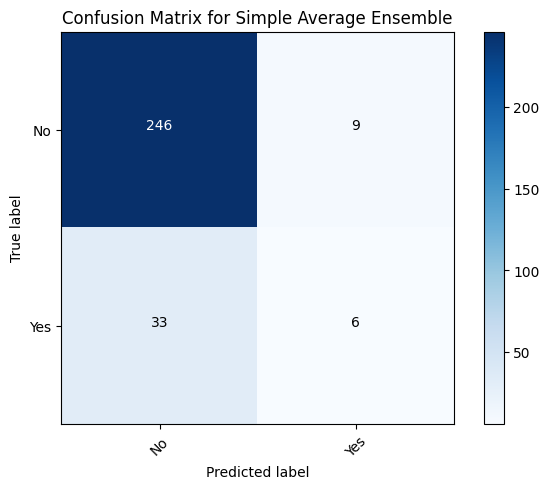

In [103]:
fnn_predictions = best_fnn_model.predict(X_test)
wd_predictions = best_wd_model.predict([X_test, X_test])
cnn_predictions = best_cnn_model.predict(X_test)

# Compute simple average predictions
simple_avg_predictions = (fnn_predictions + wd_predictions + cnn_predictions) / 3

# Round the predictions to get binary labels
simple_avg_predictions = np.round(simple_avg_predictions).astype(int)

# Evaluate the simple average ensemble model
evaluate_ensemble_model(y_test, simple_avg_predictions, "Simple Average Ensemble")

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, simple_avg_predictions)

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No', 'Yes'], model_name="Simple Average Ensemble")
plt.show()


-------- Ensemble Method: stacking ----------
37/37 [==============================] - 0s 806us/step
Reloading Tuner from stacking_hyperparameter_tuning\stacking\tuner0.json
Best Hyperparameters:
units_1: 224
dropout_1: 0.2
units_2: 160
dropout_2: 0.30000000000000004
learning_rate: 0.0001
Epoch 1/100
30/30 [==============================] - 1s 5ms/step - loss: 0.6868 - accuracy: 0.7202 - val_loss: 0.6794 - val_accuracy: 0.7966
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.8404 - val_loss: 0.6618 - val_accuracy: 0.7966
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6418 - accuracy: 0.8404 - val_loss: 0.6417 - val_accuracy: 0.7966
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.8404 - val_loss: 0.6196 - val_accuracy: 0.7966
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.8404 - val_loss: 0.5992 - val_accuracy: 0.7966
Epoc

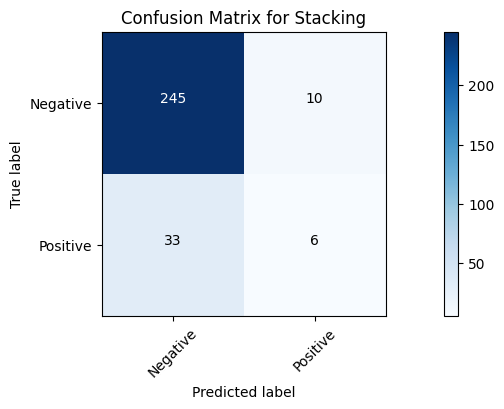

In [104]:
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers


def create_metamodel_fnn(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32),
                    activation='relu',
                    input_dim=input_dim))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=256, step=32),
                    activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

def tune_metamodel(X_train, y_train):
    tuner = RandomSearch(
        create_metamodel_fnn,
        objective='val_accuracy',
        max_trials=150,
        executions_per_trial=3,
        directory='stacking_hyperparameter_tuning',
        project_name='stacking')

    tuner.search(X_train, y_train, epochs=100, validation_split=0.2)
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    return best_hps

def ensemble_predict(models, X_test, X_train, method):
    test_predictions = []
    train_predictions = []
    
    for model in models:
        if isinstance(model, Sequential):
            X_test_input = X_test 
            X_train_input = X_train
        elif isinstance(model, Model):
            X_test_input = (X_test, X_test)
            X_train_input = (X_train, X_train)
        else:
            raise ValueError("Invalid model type provided.")
        
        test_predictions.append(model.predict(X_test_input))
        train_predictions.append(model.predict(X_train_input))
    
    if method == 'simple_average':
        test_predictions = np.array(test_predictions)
        ensemble_predictions = np.round(np.mean(test_predictions, axis=0)).astype(int)
        evaluate_ensemble_model(y_test, ensemble_predictions, "Simple Average")
        return ensemble_predictions
    elif method == 'voting':
        test_predictions = np.array(test_predictions)
        num_samples = test_predictions.shape[1]
        num_models = test_predictions.shape[0]
        test_predictions = test_predictions.reshape(num_samples, num_models)
        class_votes = np.sum(test_predictions, axis=1)
        class_votes = np.expand_dims(class_votes, axis=1)
        final_prediction = np.where(class_votes >= 0.5, 1, 0)
        evaluate_ensemble_model(y_test, final_prediction, "Voting")
        return final_prediction
    elif method == 'stacking':
        meta_X_train = np.concatenate(train_predictions, axis=1)
        meta_X_test = np.concatenate(test_predictions, axis=1)

        best_hps = tune_metamodel(meta_X_train, y_train)
        print(best_hps)
        print("Best Hyperparameters:")
        for param, value in best_hps.values.items():
            print(f"{param}: {value}")
            
        meta_model = create_metamodel_fnn(best_hps)

        meta_model.fit(meta_X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
        model_name = 'Stacking'
        prepare_evaluation(meta_model, model_name, meta_X_test, y_test)
        df_ensemble_metrics = pd.DataFrame(ensemble_metrics).T
        print('df_ensemble_metrics')
        print(df_ensemble_metrics)
        print()
        meta_model.save("stacking_ensemble_model.h5")
        meta_predictions = meta_model.predict(meta_X_test)
        return np.round(meta_predictions).astype(int)
    else:
        raise ValueError("Invalid ensemble method provided.")

stacking_accuracy = 0
voting_accuracy = 0
simple_average_accuracy = 0
ensemble_accuracy = 0
ensemble_metrics = {}
meta_model = Sequential()
meta_X_test = []

ensemble_methods = ['stacking', 'voting', 'simple_average']

for i, method in enumerate(ensemble_methods, 1):

    print(f"\n-------- Ensemble Method: {method} ----------")
    ensemble_predictions = ensemble_predict(models, X_test, X_train, method)
    ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
    ensemble_metrics[method] = ensemble_accuracy
    print(f"Accuracy of {method} method: {ensemble_accuracy}")
    if method == 'stacking':
        stacking_accuracy = ensemble_accuracy
    elif method == 'voting':
        voting_accuracy = ensemble_accuracy
    elif method == 'simple_average':
        simple_average_accuracy = ensemble_accuracy


    print()
    print(f"Accuracy of {method} method: {ensemble_accuracy}")
    # print(f"Predictions for {method} method:", ensemble_predictions)  # Print predictions for each method
    ensemble_accuracy = 0

best_fnn_model.save("fnn_model.h5")
best_wd_model.save("wide_and_deep_model.h5")
best_cnn_model.save("cnn_model.h5")

print()
print()
print("Accuracy for Stacking:", "{:.2%}".format(stacking_accuracy))
print("Accuracy for Voting:", "{:.2%}".format(voting_accuracy))
print("Accuracy for Simple Average:", "{:.2%}".format(simple_average_accuracy))
print()
print()

## Model Evaluation

In [105]:
print(model_and_score)

{}


In [106]:
print(models)

[<keras.src.engine.sequential.Sequential object at 0x000001D4C397F990>, <keras.src.engine.functional.Functional object at 0x000001D4C22F7F10>, <keras.src.engine.sequential.Sequential object at 0x000001D4C2444150>]


In [107]:
# Load trained models from pickle files
dl_ensemble_models = []

stacking_model = load_model("./stacking_ensemble_model.h5")
# simple_average_model = np.load("./simple_average_ensemble_model.npy")
# voting_model = np.load("./voting_ensemble_model.npy")

fnn_model = load_model("./fnn_model.h5")
wide_and_deep_model = load_model("./wide_and_deep_model.h5")
cnn_model = load_model("./cnn_model.h5")

# dl_base_models = [fnn_model, wide_and_deep_model, cnn_model]
models = [best_fnn_model, best_wd_model, best_cnn_model] 
dl_base_models = models
dl_ensemble_models = [meta_model]

In [108]:
# trained_models

dl_ensemble_models

In [109]:
dl_base_models

In [110]:
models

In [111]:
len(X_test_svd)

294

10/10 [==============================] - 0s 889us/step

               Accuracy  F1 Score  Precision    Recall  Support  Specificity  \
FNN            0.860544  0.280702   0.444444  0.205128     39.0     0.960784   
Wide and Deep  0.857143  0.192308   0.384615  0.128205     39.0     0.968627   
CNN            0.843537  0.148148   0.266667  0.102564     39.0     0.956863   

               Misclassification Rate  
FNN                          0.139456  
Wide and Deep                0.142857  
CNN                          0.156463  



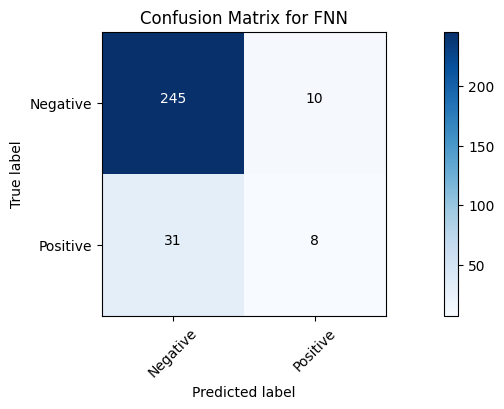

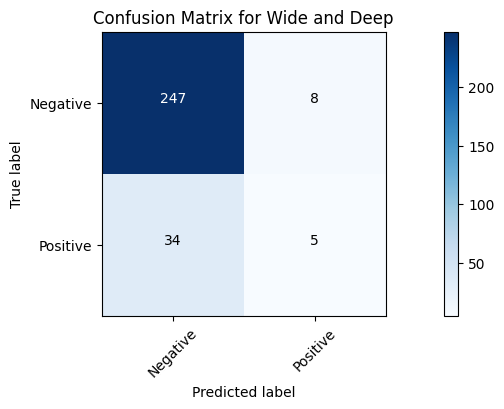

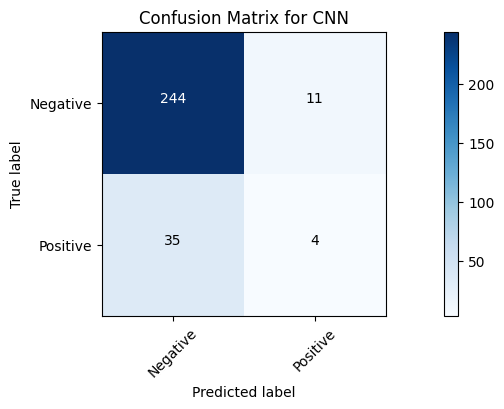

In [112]:
# Prepare Confusion Matrix

# Ensure y_test is encoded properly
encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)

# Define a function to prepare confusion matrix and evaluation metrics for base models
def prepare_evaluation(model, model_name, X_test, y_test):
    plt.figure(figsize=(12, 4))

    if model.name.startswith('sequential'):
        y_pred_proba = model.predict(X_test)  # Default for single-input models
    elif model.name.startswith('model'):
        y_pred_proba = model.predict([X_test, X_test])

    # Convert probabilities to binary predictions using a threshold of 0.5
    y_pred_binary = (y_pred_proba > 0.5).astype(int)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred_binary)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_binary)
    
    # Calculate other metrics
    f1 = f1_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    misclassification_rate = 1 - accuracy
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    # Update ensemble metrics dictionary
    ensemble_metrics[model_name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Support': tp + fn,
        'Specificity': specificity,
        'Misclassification Rate': misclassification_rate
    }

    # Plot confusion matrix
    plot_confusion_matrix(cm, classes=['Negative', 'Positive'], model_name=model_name)


df_base_model_metrics = []
ensemble_metrics = {}

# Call the function for base model evaluation
for i, base_model in enumerate(dl_base_models, 1):
    print(base_model)
    if i == 1:
        model_name = 'FNN'
    elif i == 2:
        model_name = 'Wide and Deep'
    elif i == 3:
        model_name = 'CNN'
    prepare_evaluation(base_model, model_name, X_test_svd, y_test_encoded)

# Print ensemble metrics as a table using pandas DataFrame
df_base_model_metrics = pd.DataFrame(ensemble_metrics).T
print()
print(df_base_model_metrics)
print()

In [ ]:
# for index, tup in enumerate(trained_models):
#     prepare_classification_report(tup[0], tup[1])
#     print("\n")

In [ ]:
# Prepare ROC curve

# Ensure y_test is encoded properly
encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)

# Iterate over trained models and prepare ROC curves
for i, model in enumerate(models, 1):
    if i == 1:
        model_name = 'FNN'
    elif i == 2:
        model_name = 'Wide and Deep'
    elif i == 3:
        model_name = 'CNN'
    prepare_roc_curve(model, model_name, X_test_svd, y_test_encoded)


# for i, model in enumerate(dl_ensemble_models, 1):
#     print(model)
#     if i == 1:
#         model_name = 'Stacking'
#     elif i == 2:
#         model_name = 'Voting'
#     elif i == 3:
#         model_name = 'Simple Average'
#     prepare_roc_curve(model, model_name, X_test_svd, y_test_encoded)

In [ ]:
# Prepare Classification Report

# Transform input data using preprocessing steps
input_data = [input_data_df1, input_data_df2, input_data_df3, input_data_df4]

input_data_transformed = [model.named_steps['processing'].transform(data) for data in input_data]
input_data_svd = [model.named_steps['pca'].transform(data_transformed) for data_transformed in input_data_transformed]

# Define a function to convert probabilities to Yes/No labels
def convert_to_yes_no(predictions):
    return ["Yes" if pred > 0.5 else "No" for pred in predictions]

# Make predictions using the deep learning ensemble models
ensemble_predictions = {
    'simple_avg': [],
    'voting': [],
    'stacking': []
}

# ensemble_predictions = {
#     'simple_avg': [np.mean([model.predict(svd) for model in dl_ensemble_models_simple_avg], axis=0) for svd in input_data_svd],
#     'voting': [np.mean([model.predict(svd) for model in dl_ensemble_models_voting], axis=0) for svd in input_data_svd],
#     'stacking': [np.mean([model.predict(svd) for model in dl_ensemble_models_stacking], axis=0) for svd in input_data_svd]
# }

# for model in dl_ensemble_models_simple_avg:
#     if isinstance(model, Sequential):  # Adjust 'CNNModel' to the actual class name of your CNN model
#         input_data_reshaped = [np.expand_dims(svd, axis=2) for svd in input_data_svd]
#         predictions = model.predict(input_data_reshaped)
#     else:
#         predictions = [model.predict(svd) for svd in input_data_svd]
#     ensemble_predictions['simple_avg'].append(np.mean(predictions, axis=0))


# for model in dl_ensemble_models_voting:
#     if isinstance(model, Sequential):  # Adjust 'CNNModel' to the actual class name of your CNN model
#         input_data_reshaped = [np.expand_dims(svd, axis=2) for svd in input_data_svd]
#         predictions = model.predict(input_data_reshaped)
#     else:
#         predictions = [model.predict(svd) for svd in input_data_svd]
#     ensemble_predictions['voting'].append(np.mean(predictions, axis=0))

# for model in dl_ensemble_models_stacking:
#     if isinstance(model, Sequential):  # Adjust 'CNNModel' to the actual class name of your CNN model
#         input_data_reshaped = [np.expand_dims(svd, axis=2) for svd in input_data_svd]
#         predictions = model.predict(input_data_reshaped)
#     else:
#         predictions = [model.predict(svd) for svd in input_data_svd]
#     ensemble_predictions['stacking'].append(np.mean(predictions, axis=0))

for model in dl_ensemble_models_simple_avg:
    if isinstance(model, Sequential):
        input_data_reshaped = [np.expand_dims(svd, axis=2) for svd in input_data_svd]
        predictions = model.predict(input_data_reshaped)
    else:
        predictions = [model.predict(svd) for svd in input_data_svd]
    ensemble_predictions['simple_avg'].append(predictions)

for model in dl_ensemble_models_voting:
    if isinstance(model, Sequential):
        input_data_reshaped = [np.expand_dims(svd, axis=2) for svd in input_data_svd]
        predictions = model.predict(input_data_reshaped)
    else:
        predictions = [model.predict(svd) for svd in input_data_svd]
    ensemble_predictions['voting'].append(predictions)

for model in dl_ensemble_models_stacking:
    if isinstance(model, Sequential):
        input_data_reshaped = [np.expand_dims(svd, axis=2) for svd in input_data_svd]
        predictions = model.predict(input_data_reshaped)
    else:
        predictions = [model.predict(svd) for svd in input_data_svd]
    ensemble_predictions['stacking'].append(predictions)

# Convert ensemble predictions to Yes/No labels
ensemble_labels = {
    'simple_avg': [convert_to_yes_no(predictions) for predictions in ensemble_predictions['simple_avg']],
    'voting': [convert_to_yes_no(predictions) for predictions in ensemble_predictions['voting']],
    'stacking': [convert_to_yes_no(predictions) for predictions in ensemble_predictions['stacking']]
}

# Display the predictions
for i, data in enumerate(input_data):
    print(f"\nPredictions for input_data{i+1}:")
    print("Simple Average Ensemble:", ensemble_labels['simple_avg'][i], " Chance of Leaving: ", ensemble_predictions['simple_avg'][i])
    print("Voting Ensemble:", ensemble_labels['voting'][i], " Chance of Leaving: ", ensemble_predictions['voting'][i])
    print("Stacking Ensemble:", ensemble_labels['stacking'][i], " Chance of Leaving: ", ensemble_predictions['stacking'][i])


In [ ]:
# # Prepare your input data (input_data_df1, input_data_df2, input_data_df3, input_data_df4)
# input_data = [input_data_df1, input_data_df2, input_data_df3, input_data_df4]

# # Preprocess the input data to match the expected input shapes of the models
# # (You might need to adjust this based on your actual preprocessing steps)
# input_data_transformed = [model.named_steps['processing'].transform(data) for data in input_data]
# input_data_svd = [model.named_steps['pca'].transform(data_transformed) for data_transformed in input_data_transformed]

# # Define a function to convert probabilities to Yes/No labels
# def convert_to_yes_no(predictions):
#     return ["Yes" if pred > 0.5 else "No" for pred in predictions]

# # Make predictions using the deep learning ensemble models
# ensemble_predictions = {
#     'simple_avg': [],
#     'voting': [],
#     'stacking': []
# }

# # Iterate over each ensemble method
# for ensemble_method in dl_ensemble_models:
#     method_name = ensemble_method['method']
#     models = ensemble_method['models']
    
#     # Iterate over each model in the ensemble
#     for model in models:
#         if isinstance(model, Sequential):  
#             # Adjust input data shape for sequential models
#             input_data_reshaped = [np.expand_dims(svd, axis=2) for svd in input_data_svd]
#             predictions = model.predict(input_data_reshaped)
#         else:
#             predictions = [model.predict(svd) for svd in input_data_svd]
        
#         ensemble_predictions[method_name].append(predictions)

# # Convert ensemble predictions to Yes/No labels
# ensemble_labels = {
#     'simple_avg': [convert_to_yes_no(predictions) for predictions in ensemble_predictions['simple_avg']],
#     'voting': [convert_to_yes_no(predictions) for predictions in ensemble_predictions['voting']],
#     'stacking': [convert_to_yes_no(predictions) for predictions in ensemble_predictions['stacking']]
# }

# # Display the predictions
# for i, data in enumerate(input_data):
#     print(f"\nPredictions for input_data{i+1}:")
#     print("Simple Average Ensemble:", ensemble_labels['simple_avg'][i], " Chance of Leaving: ", ensemble_predictions['simple_avg'][i])
#     print("Voting Ensemble:", ensemble_labels['voting'][i], " Chance of Leaving: ", ensemble_predictions['voting'][i])
#     print("Stacking Ensemble:", ensemble_labels['stacking'][i], " Chance of Leaving: ", ensemble_predictions['stacking'][i])